In [20]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import svm

In [6]:
digits_data = load_digits()
digits_data.data.shape

(1797, 64)

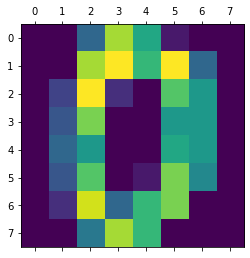

In [7]:
plt.matshow(digits_data.images[0])

<Figure size 432x288 with 0 Axes>

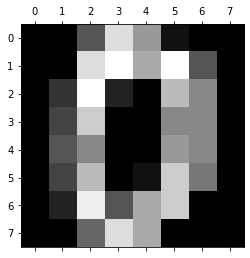

In [11]:
plt.gray()
plt.matshow(digits_data.images[0])
plt.show()

In [13]:
digits_data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [18]:
images = list(zip(digits_data.images, digits_data.target))
plt.figure(figsize=(4,4))

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

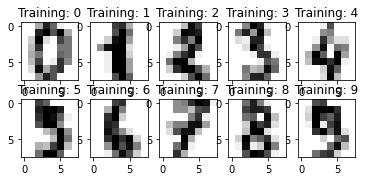

In [19]:
for i, (image, label) in enumerate(images[:10]):
    plt.subplot(3,5, i+1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Training: %i" % label)
#display the plot
plt.show()

In [21]:
#get the total number of samples
img_samples = len(digits_data.images)
#get the handwritten images
img = digits_data.images.reshape(img_samples,-1)
#get target labels
labels = digits_data.target

classify = svm.SVC(gamma=0.001)

#flatten sample imagees are stored in img variable
img_half = img[:img_samples // 2]
#target labels are stored in labels variable
labels_half = labels[:img_samples //2]

classify.fit(img_half, labels_half)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
labels_expected = digits_data.target[img_samples // 2:]
img_predicted = classify.predict(img[img_samples // 2:])
images_predictions = list(zip(digits_data.images[img_samples // 2:], img_predicted))

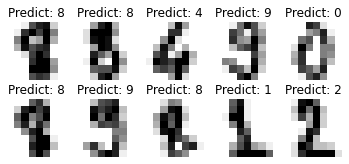

In [23]:
for i, (image, predict) in enumerate(images_predictions[:10]):
    #initialize the subplot of size 3x5
    plt.subplot(3,5, i+1)
    #turn of the axis values (the labels for each value in x and y axis)
    plt.axis('off')
    #display the predicted images in the subplot
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    #set the title for each subplot in the main plot
    plt.title("Predict: %i" % predict)
plt.show()